In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import altair

In [3]:
from trade_list_tools import TradeListTools

In [4]:
import glob
from IPython.display import clear_output

In [ ]:
!ls -ltr /Users/szagar/work/zts/bta_data_dev/ts_data/backtests/trades/s5094_bt15619_@MES_bpv5.csv

In [5]:
tlt = TradeListTools()
cnt = 0
for fn in glob.glob('/Users/szagar/work/zts/bta_data_dev/ts_data/backtests/trades/*bpv*.csv'):
    cnt += 1
    print(fn)
    df = tlt.load_trades(fn)
    #tlt.info()
    df[['cum_pnl','max_pnl']].plot(figsize=(8,4))
    plt.text(100,100,'sample text')
    plt.show()
    inp = input('hit enter')
    clear_output(wait=True)
    if cnt == 5:
        break

In [ ]:
#Import tkinter library
from tkinter import *
#Create an instance of Tkinter frame or window
win= Tk()
#Set the geometry of tkinter frame
win.geometry("750x250")
def callback():
   Label(win, text="Hello World!", font=('Century 20 bold')).pack(pady=4)
#Create a Label and a Button widget
btn=Button(win, text="Press Enter", command= callback)
btn.pack(ipadx=10)
win.bind('<Return>',lambda event:callback())
win.mainloop()

In [41]:
trades_file = '/Users/szagar/work/zts/bta_data_dev/ts_data/backtests/BOS_613_MAE@NQ_bpv20_trades.csv'
bars_file = '/Users/szagar/work/zts/bta_data_dev/ts_data/bars/@NQ.csv'

!ls -lt /Users/szagar/work/zts/bta_data_dev/ts_data/bars

total 106480
-rw-r--r--  1 szagar  staff  4472584 Apr 22 06:44 @EC.csv
-rw-r--r--  1 szagar  staff  4505479 Apr 18 08:52 @MNQ.csv
-rw-r--r--  1 szagar  staff  3992285 Apr 18 08:50 @CL.csv
-rw-r--r--  1 szagar  staff  4506759 Apr 18 08:49 @NQ.csv
-rw-r--r--  1 szagar  staff  4091690 Apr 18 08:47 @EMD.csv
-rw-r--r--  1 szagar  staff  4301890 Apr 18 08:42 @QM.csv
-rw-r--r--  1 szagar  staff  4418386 Apr 18 08:40 @ES.csv
-rw-r--r--  1 szagar  staff  3777949 Apr 13 21:38 @YM.csv
-rw-r--r--  1 szagar  staff  4166280 Apr  6 13:55 @GC.csv
-rw-r--r--  1 szagar  staff  3777843 Apr  4 22:36 @MYM.csv
-rw-r--r--  1 szagar  staff  4417057 Mar 30 06:31 @MES.csv
-rw-r--r--  1 szagar  staff  4158997 Mar 27 10:23 @M2K.csv
-rw-r--r--  1 szagar  staff  3906149 Mar 26 13:57 @NG.csv


In [42]:
tlt = TradeListTools()

### Load trades

In [43]:
df = tlt.load_trades(trades_file)
tlt.info()

r1            = 8860.0  (MaxLoss100)

pnt_mulipler  = 20.0

net profit     = 52,985.0

profit factor  = 1.25

win percent    = 56.55

expectancy(R)  = 0

expectancy($)  = 60.63

R max          = 0.58

R min          = -1.0

number trades  = 909

number winners = 514

number losers  = 395

average trade  = 58.29

average win    = 520.5

average loss   = -537.9

max win        = 5130.0

max loss       = -8860.0

win/loss ratio = 0.97

sqn            = 1.9

sqn100         = 1.11

pnl_sqn        = 1.9

pnl_sqn100     = 1.11

drawdown       = -19170

np / dd       = 2.8

pareto        = 40.08% of winners responsible for 80% of profits

pareto_loss   = 97.97% of losers responsible for 80% of loses

mean R = 0.006578931030800597
max R = 0.5790067720090294
min R = -1.0


<AxesSubplot:xlabel='entry_ts'>

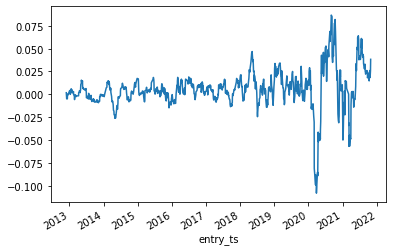

In [44]:
print(f"mean R = {df['Rmult'].mean()}")
print(f"max R = {df['Rmult'].max()}")
print(f"min R = {df['Rmult'].min()}")
df['Rmult'].rolling(20).mean().plot()

<AxesSubplot:xlabel='entry_ts'>

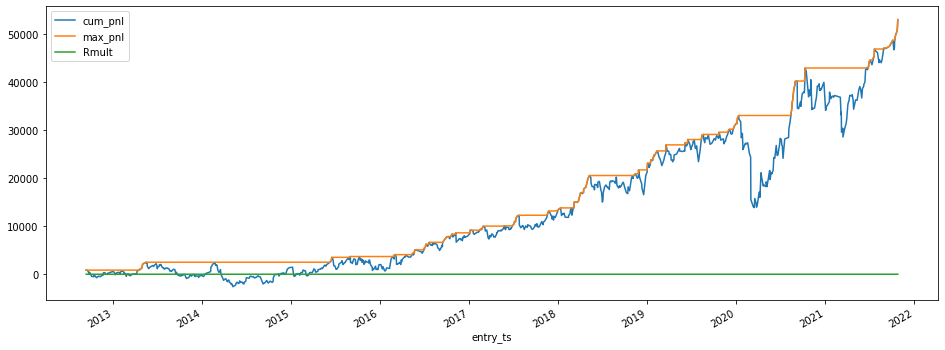

In [45]:
df[['cum_pnl','max_pnl','Rmult']].plot(figsize=(16,6))

<AxesSubplot:xlabel='entry_ts'>

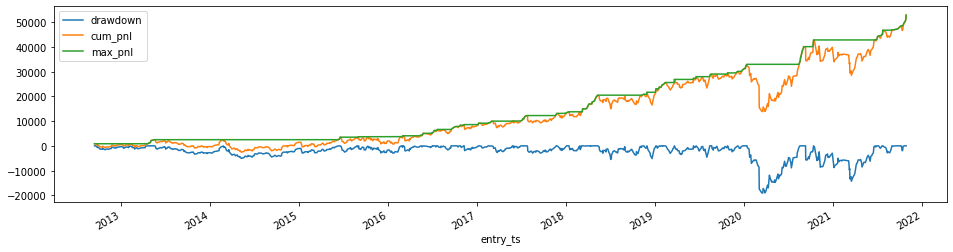

In [46]:
df[['drawdown','cum_pnl','max_pnl']].plot(figsize=(16,4))

<AxesSubplot:xlabel='entry_ts'>

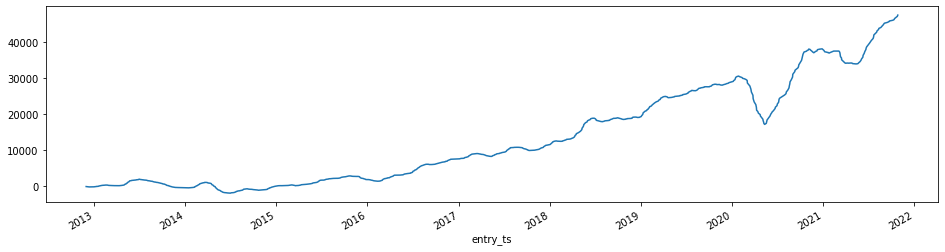

In [47]:
df['cum_pnl'].rolling(20).mean().plot(figsize=(16,4))

### Load bar data

In [48]:
bars_df = tlt.load_bars(bars_file)
print(f"{len(bars_df):,} bars")
bars_df.head()

77,229 bars


,BarNum,Open,High,Low,Close
2009-01-06 09:00:00,1,1302.50,1308.50,1293.25,1306.00
2009-01-06 10:00:00,2,1306.00,1309.00,1292.25,1295.00
2009-01-06 11:00:00,3,1295.25,1298.25,1289.50,1296.50
2009-01-06 12:00:00,4,1296.75,1308.00,1295.25,1306.75
2009-01-06 13:00:00,5,1306.75,1306.75,1295.75,1299.25


### MAE / MFE

In [49]:
mae_df = tlt.set_max_excursions()
mae_df.head()

,entry_ts,entry_px,exit_ts,exit_px,StopPr,MarkPos,pnl,TrRisk,size,symbol,ATREnt,CurrConv,Rmult,cum_pnl,max_pnl,drawdown,pdHighestHigh,pdLowestLow,mae,mfe
entry_ts,,,,,,,,,,,,,,,,,,,,
2012-09-13 09:05:00,9/13/2012 9:05:00,2859.25,2012-09-13 13:25:00,2902.00,0.0,1,855.0,0.0,1,@NQ,2.850,1.0,0.096501,855.0,855.0,0.0,2894.75,2854.75,-90.0,710.0
2012-09-18 10:25:00,9/18/2012 10:25:00,2922.00,2012-09-18 13:25:00,2920.50,0.0,1,-30.0,0.0,1,@NQ,4.225,1.0,-0.003386,825.0,855.0,-30.0,2922.75,2913.75,-165.0,15.0
2012-09-21 08:25:00,9/21/2012 8:25:00,2939.50,2012-09-21 13:25:00,2927.50,0.0,1,-240.0,0.0,1,@NQ,3.150,1.0,-0.027088,585.0,855.0,-270.0,2940.50,2931.25,-165.0,20.0
2012-09-25 10:25:00,9/25/2012 10:25:00,2921.00,2012-09-25 13:25:00,2899.75,0.0,1,-425.0,0.0,1,@NQ,4.375,1.0,-0.047968,160.0,855.0,-695.0,2921.75,2899.75,-425.0,15.0
2012-09-27 11:25:00,9/27/2012 11:25:00,2875.50,2012-09-27 13:25:00,2887.00,0.0,1,230.0,0.0,1,@NQ,7.025,1.0,0.025959,390.0,855.0,-465.0,2886.50,2867.75,-155.0,220.0


In [50]:
winner = mae_df[mae_df['pnl'] >= 0][['pnl','mae']]
winner['winner'] = True
loser = mae_df[mae_df['pnl'] < 0][['pnl','mae']]
loser['winner'] = False

winner['pnl'] = abs(winner['pnl'])
winner['mae'] = abs(winner['mae'])
loser['pnl'] = abs(loser['pnl'])
loser['mae'] = abs(loser['mae'])

#mae = winner.append(loser, ignore_index=True)
#mae['pnl'] = abs(mae['pnl'])
#mae['mae'] = abs(mae['mae'])
#mae.sample(5)

In [51]:
winner.head()

,pnl,mae,winner
entry_ts,,,
2012-09-13 09:05:00,855.0,90.0,True
2012-09-27 11:25:00,230.0,155.0,True
2012-10-16 07:25:00,400.0,225.0,True
2012-11-01 09:25:00,310.0,80.0,True
2012-11-06 11:05:00,20.0,65.0,True


In [52]:
nrow = 1
ncol = 2
fig, ax = plt.subplots(nrow, ncol)
ax(1,1).scatter(x = winner['mae'], y = winner['pnl'], marker='o', color='green', s=20, label='Winners')
ax(1,2).scatter(x = loser['mae'], y = loser['pnl'], marker='x', color='red', s=20, label='Losers')
#df_list[count].plot(ax=axes[r,c])

'''
#fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = winner['mae'], y = winner['pnl'], marker='o', color='green', s=20, label='Winners')
ax.scatter(x = loser['mae'], y = loser['pnl'], marker='x', color='red', s=20, label='Losers')
mae_pnl=winner['mae'].max()
ax.axvline(mae_pnl, color='grey', linestyle='--', alpha=0.5)
mae_lt_pnl=winner[winner['pnl'] > winner['mae']]['mae'].max()
ax.axvline(mae_lt_pnl, color='grey', linestyle='--', alpha=0.5)
ax.axhline(tlt.avg_win_trade(), color='grey', linestyle='--', alpha=0.5)
ax.axhline(tlt.avg_win_trade()+tlt.std_win_trade(), color='grey', linestyle='--', alpha=0.5)
ax.axhline(tlt.avg_win_trade()+2*tlt.std_win_trade(), color='grey', linestyle='--', alpha=0.5)
plt.plot([], [], ' ', label=f"Max winner MAE: {mae_pnl}")
plt.plot([], [], ' ', label=f"Max MAE (pnl>MAE): {mae_lt_pnl}")

plt.xlabel("MAE")
plt.ylabel("PnL")
plt.legend()
#plt.show()
'''

NameError: name 'plt' is not defined

### R1

In [27]:
tlt.help()

set_r1( value=< int constant > )
            set_r1( MaxLoss )
            set_r1( AvgLoss )
            set_r1( MaxLoss100 )
            set_r1( AvgLoss100 )

In [37]:
tlt.set_r1(unit='MaxLoss')
tlt.info()
'''
mean = 0.1423085234464236
std  = 1.5395091563010361
cnt  = 493
sqn            = 2.05
'''
'''
in calc_sqn
mean = 0.03159582999198075
std  = 0.3418071412419514
cnt  = 493
sqn            = 2.05
'''

r1            = 537.5  (MaxLoss)

pnt_mulipler  = 5.0

net profit     = 8,372.5

profit factor  = 1.3

win percent    = 52.54

expectancy(R)  = 0

expectancy($)  = 16.99

R max          = 2.61

R min          = -1.0

number trades  = 493

number winners = 259

number losers  = 234

average trade  = 16.98

average win    = 140.14

average loss   = -119.34

max win        = 1402.5

max loss       = -537.5

win/loss ratio = 1.17

sqn            = 2.05

sqn100         = 1.91

pnl_sqn        = 2.05

pnl_sqn100     = 1.91

drawdown       = -2147

np / dd       = 3.9

pareto        = 45.17% of winners responsible for 80% of profits

pareto_loss   = 91.03% of losers responsible for 80% of loses

'\nin calc_sqn\nmean = 0.03159582999198075\nstd  = 0.3418071412419514\ncnt  = 493\nsqn            = 2.05\n'

In [ ]:
tlt.trades_df['drawdown'].min()

In [ ]:
tlt.trades_df['drawdown'].abs().max()

In [ ]:
tlt.set_r1('AvgLoss')

### re-sampling data

In [ ]:
#df.resample(rule='A').mean()
#df.resample(rule='Q').mean()
#df.resample(rule='BQ').mean()
df.resample(rule='A').max().head()

In [ ]:
def first_day(entry):
    return entry[0]
df.resample('A').apply(first_day).head()

<AxesSubplot:xlabel='entry_ts'>

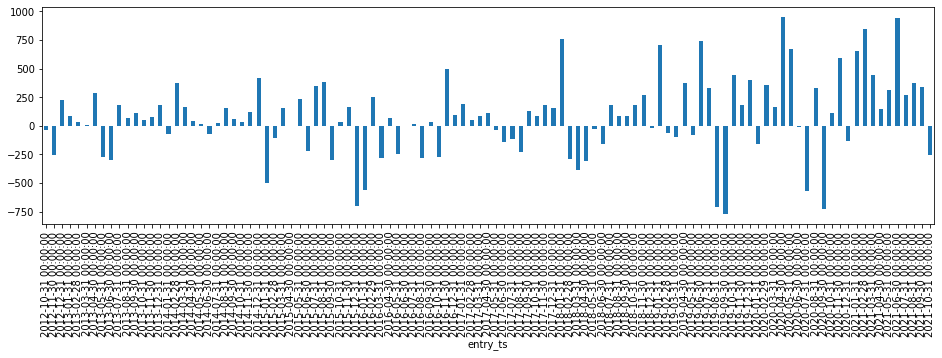

In [9]:
df['pnl'].resample('M').sum().plot(kind='bar',figsize=(16,4))

### Time Shifting

In [ ]:
bars_df.head()

In [ ]:
#df.head(5)
bars_df.head()
bars_df.shift(periods=1).head()

### Rolling and Expanding

In [ ]:
import pandas as pd

In [ ]:
bac_df = pd.read_csv('../../tests/data/BAC.csv',parse_dates=True,index_col=0)
bac_df.head()

In [ ]:
bac_df['Close 30 Day MA'] = bac_df['Close'].rolling(30).mean()
bac_df.head(5)

In [ ]:
bac_df[['Close 30 Day MA','Close']].plot(figsize=(16,6))

In [ ]:
bac_df['Close'].expanding().mean().plot(figsize=(16,4))

#### Bollinger Band example

In [ ]:
bac_df['Close of 20 Day MA'] = bac_df['Close'].rolling(20).mean()
# Upper = 20MA + 2*std(20)
bac_df['Upper'] = bac_df['Close of 20 Day MA'] + 3 * (bac_df['Close'].rolling(20).std())
# Lower = 20MA = 2*std(20)
bac_df['Lower'] = bac_df['Close of 20 Day MA'] - 3 * (bac_df['Close'].rolling(20).std())

bac_df[['Close','Close of 20 Day MA','Upper','Lower']].plot(figsize=(16,6))

In [ ]:
#cat ../../lib/trade_list_tools.py
!head /Users/szagar/work/zts/bta_data_dev/ts_data/backtests/trades/s5030_bt15567_@MNQ_bars.csv

In [ ]:
import pandas as pd

In [ ]:
bars_df = pd.read_csv(bars_file,index_col=0,names=['bar','o','h','l','c','na'])
bars_df = bars_df.drop('na',axis=1)
bars_df

In [ ]:
    def set_r1(r1_param, df):
        if r1_param == "MaxLoss":
            r = abs(df[df["pnl"] < 0]["pnl"].min())
        elif r1_param == "AvgLoss":
            r = abs(df[df["pnl"] < 0]["pnl"].mean())
        elif r1_param == "MaxLoss100":
            r = abs(df[df["pnl"] < 0]["pnl"].tail(100).min())
        elif r1_param == "AvgLoss100":
            r = abs(df[df["pnl"] < 0]["pnl"].tail(100).mean())
        elif isinstance(r1_param, int):
            r = r1_param
        return int(r)

    print(set_r1('MaxLoss',df))
    print(set_r1('AvgLoss',df))
    print(set_r1('MaxLoss100',df))
    print(set_r1('AvgLoss100',df))

In [ ]:
df["Rmult"] = df["pnl"] / set_r1('AvgLoss',df)
df.sort_values('Rmult').tail(20)

In [ ]:
    def trades_df(self, r1_param="MaxLoss"):
        cum_pnl = 0
        trades = []
        for elm in self.root.findall("./Trades/"):
            a = {b.tag: b.text for b in elm.iter()}
            if a["Type"] in ("LExit", "SExit"):
                trade = self.process_exit(trade, a)
                cum_pnl += trade["pnl"]
                trade["cum_pnl"] = cum_pnl
                trades.append(trade)
            elif a["Type"] in ("Buy", "Sell"):
                trade = self.process_entry(a)
            else:
                print(f"WARNING: WARNING: type: {a['Type']} Not Recognized")

        df = pd.DataFrame.from_dict(trades)

        ## add R1 multiplier column
        self.r1 = round(self.set_r1(r1_param, df), 2)
        df["Rmult"] = df["pnl"] / self.r1

        self.pnt_mulipler = self.calc_pnt_multiplier(df)
        self.number_trades = len(df.index)
        self.sqn = self.calc_sqn(df)
        self.sqn100 = self.calc_sqn(df, 100)
        self.sqn_pnl = self.calc_sqn_pnl(df)
        self.sqn100_pnl = self.calc_sqn_pnl(df, 100)
        self.pareto = self.calc_pareto(df, percent_outcomes=80)
        self.pareto_loses = self.calc_pareto(df, percent_outcomes=80, winning=False)

        return df

In [ ]:
    def set_max_excursions(r1_param):
        t_df = self.trades_df(r1_param)
        b_df = self.bars_df()
        t_df['pdMaxClose'] = 0.0
        t_df['pdMinClose'] = 0.0
        t_df['pdMaxPrice'] = 0.0
        t_df['pdMinPrice'] = 0.0
        for i, row in t_df.iterrows():
            entry_ts = row['entry_ts']
            exit_ts = row['exit_ts']
            max_close = b_df[(b_df.index>=entry_ts) & (b_df.index<=exit_ts)]['close'].max()
            min_close = b_df[(b_df.index>=entry_ts) & (b_df.index<=exit_ts)]['close'].min()
            max_px = b_df[(b_df.index>=entry_ts) & (b_df.index<=exit_ts)]['high'].max()
            min_px = b_df[(b_df.index>=entry_ts) & (b_df.index<=exit_ts)]['low'].min()

            t_df.at[i,'pdMaxClose'] = max_close
            t_df.at[i,'pdMinClose'] = min_close
            t_df.at[i,'pdMaxPrice'] = max_px
            t_df.at[i,'pdMinPrice'] = min_px
        t_df['entry_price'] = t_df['entry_price'].astype(float)
        t_df.loc[t_df['entry_action']=='Buy','mae'] = (t_df['entry_price']-t_df['pdMinPrice']) * float(self.pnt_mulipler)
        t_df.loc[t_df['entry_action']=='Buy','mfe'] = (t_df['pdMaxPrice']-t_df['entry_price']) * float(self.pnt_mulipler)
        t_df.loc[t_df['entry_action']=='Short','mae'] = (t_df['pdMinPrice']-t_df['entry_price']) * float(self.pnt_mulipler)
        t_df.loc[t_df['entry_action']=='Short','mfe'] = (t_df['entry_price']-t_df['pdMaxPrice']) * float(self.pnt_mulipler)
        return t_df

In [ ]:
df

In [ ]:
df_ts = df.copy()

In [ ]:
import pandas as pd

In [ ]:
dt_ind = pd.DatetimeIndex(df_ts['EnDT'])

In [ ]:
df_ts.set_index(dt_ind,inplace=True)

In [ ]:
df_ts.index.max()

In [ ]:
td = df_ts.index.max() - df_ts.index.min()

In [ ]:
df_ts.index.min()

In [ ]:
df2 = df.copy()

In [ ]:
df3 = df2.drop('entry_ts',axis=1,inplace=True)

In [ ]:
df2.reset_index()

In [ ]:
df2 = df2.head(5)

In [ ]:
df2.reset_index(inplace=True)

In [ ]:
df2

In [ ]:
df2.to_dict()